# Water Quality

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('datasets/water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
data.groupby('Potability')['Potability'].count()

Potability
0    1998
1    1278
Name: Potability, dtype: int64

In [7]:
(data.isnull().sum()/data.count())*100 

ph                 17.630162
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            31.302605
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     5.202312
Turbidity           0.000000
Potability          0.000000
dtype: float64

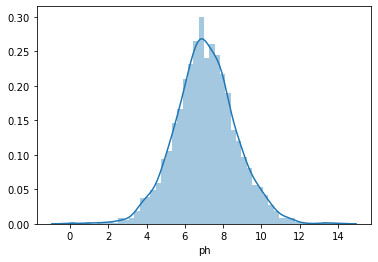

In [8]:
sns.distplot(data['ph'])

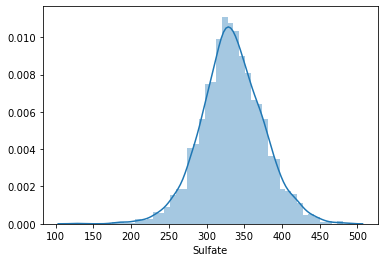

In [9]:
sns.distplot(data['Sulfate'])

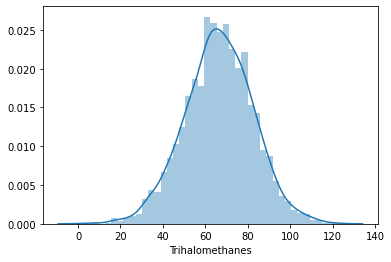

In [10]:
sns.distplot(data['Trihalomethanes'])

In [11]:
# By the above plots we can observe negligible outliers in the plots. So we can fill the null values with the mean value
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

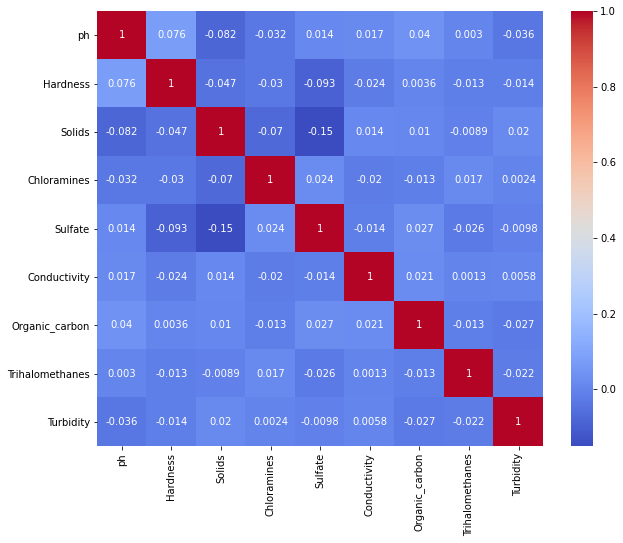

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop(columns='Potability').corr(),cmap='coolwarm',annot=True)

In [13]:
x = data.drop(columns=['Potability'])
y = data['Potability']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [14]:
params = {'criterion':['gini','entropy'],
          'min_samples_split': list(range(2,50))
         }

In [15]:
tree = DecisionTreeClassifier(random_state=15)
clf = GridSearchCV(tree,params,cv = 10, scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'gini', 'min_samples_split': 30}
0.5935750901841657


In [25]:
tree = DecisionTreeClassifier(random_state=15,criterion='gini',min_samples_split=30)
tree.fit(x_train,y_train)
print('Training score :',tree.score(x_train,y_train))
print("Test accuracy :",tree.score(x_test,y_test))

Training score : 0.8033144352376799
Test accuracy : 0.6225839267548321


#### Performance evaluation

In [26]:
y_predicted = tree.predict(x_test)
y_probabilty = tree.predict_proba(x_test)[:,1]

In [27]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       607
           1       0.51      0.50      0.50       376

    accuracy                           0.62       983
   macro avg       0.60      0.60      0.60       983
weighted avg       0.62      0.62      0.62       983



Text(33.0, 0.5, 'Actual')

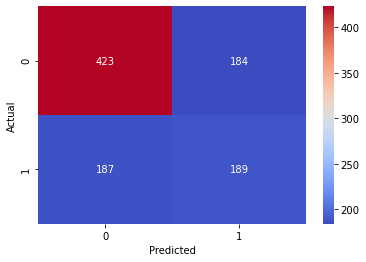

In [28]:
sns.heatmap(confusion_matrix(y_test,y_predicted),cmap="coolwarm",annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
print('Model accuracy :',accuracy_score(y_test,y_predicted))

Model accuracy : 0.6225839267548321


In [30]:
fpr,tpr,threshold = roc_curve(y_test,y_probabilty)
roc_auc_val = auc(fpr,tpr)

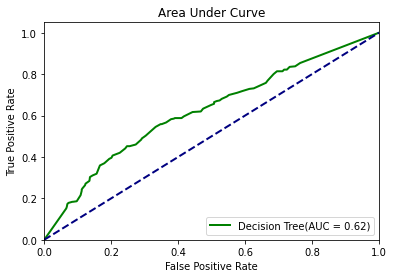

In [31]:
plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()